In [13]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

import matplotlib.pylab as plt
from sampler import sampler
import numpy as np

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [24]:
im=mnist.train.next_batch(1)[0]
im=im.reshape([28,28])
im.shape

(28, 28)

In [25]:
x = np.linspace(0, 1, 28)
y = np.linspace(0, 1,28)
xv, yv = np.meshgrid(x, y)
z=im

In [26]:
s=sampler(x,y,z)

Preparing interpolating function
Interpolation done


In [27]:
vals = s.sample(500);


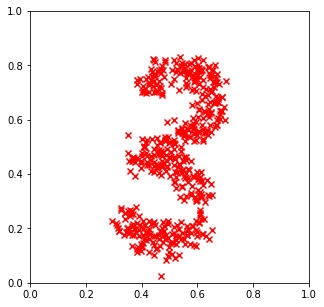

In [28]:
xVals = []; yVals = []
fig = plt.figure(figsize=(5,5))
for item in vals:  # plot point by point
        xVals.append(item[0])
        yVals.append(item[1])
        plt.scatter(item[0], 1-item[1], marker="x", c="red")
        plt.xlim([0,1])
        plt.ylim([0,1])

plt.show()

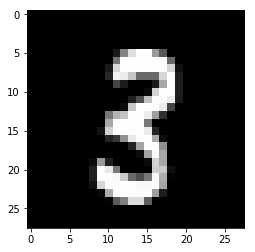

In [29]:
plt.imshow(im,cmap='gray')
plt.show()

In [20]:
x=np.linspace(0,10,11)[::-1]

In [21]:
x

array([10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1.,  0.])

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Preparing interpolating function
Interpolation done


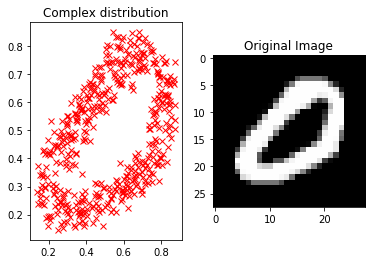

<class 'tensorflow.python.framework.ops.Tensor'> Tensor("stack_3:0", shape=(500, 2), dtype=float32)


In [40]:
def load_mnist_and_sample(batch_size):
    from tensorflow.examples.tutorials.mnist import input_data
    mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
    from sampler import sampler
    
    im=mnist.train.next_batch(1)[0]
    im=im.reshape([28,28])
    
    x = np.linspace(0, 1, 28)
    y = np.linspace(0, 1,28)
    xv, yv = np.meshgrid(x, y)
    z=im
    s=sampler(x,y,z)
    vals = s.sample(batch_size)
    
    return vals,im
    
def plot_vals_im(vals,im):
    xVals = []; yVals = []
    fig, ax = plt.subplots(nrows=1, ncols=2)
    for item in vals:  # plot point by point
            xVals.append(item[0])
            yVals.append(item[1])
            ax[0].plot(item[0], 1-item[1], marker="x", c="red")
#             ax[0].set_xlim([0,1])
#             ax[0].set_ylim([0,1])
            ax[0].set_title('Complex distribution')
    
    ax[1].imshow(im,cmap='gray')
    ax[1].set_title('Original Image')
    plt.show()
    
# vals, im = load_mnist_and_sample()
# plot_vals_im(vals,im)

def sample_complex(batch_size):
    vals, im = load_mnist_and_sample(batch_size)
    plot_vals_im(vals,im)
    
    return tf.stack(vals)

data = sample_complex(500)
print(type(data),data)

# import tensorflow as tf
# d = tf.stack(data)
# print(d)